In [1]:
from random import choice
import matplotlib.pyplot as plt
from math import(atan2,erfc,log10)
from numpy import (sin, cos, array, pi, sqrt,hsplit, argmin,arctan,arange,e, arange)
from numpy.random import normal
import matplotlib
from pylab import rcParams

In [2]:
#МОДУЛЯТОР
#ВХОДНЫЕ ДАННЫЕ#
f = 1e9                                      
F = 1e7                                     
n = 1000                                  
T = 1e-6                                      
sigma = 8
bits = [choice([0,1]) for i in range(n)] 

In [3]:
quantity_of_counts_on_chip =  round((1/F)/(1/f))
quantity_of_chips_on_bit = int(T/(1/F))
N = quantity_of_chips_on_bit*n
quantity_of_counts_all = N*quantity_of_counts_on_chip

counts_on_chip = [t*(1/f) for t in range(0,quantity_of_counts_on_chip)]         
counts_time = [t*(1/f) for t in range(0,quantity_of_counts_all)]  

print('Количество отсчетов на чип:',quantity_of_counts_on_chip)
print('Количество чипов на бит: ',quantity_of_chips_on_bit )
print('Количество отсчетов на бит: ',quantity_of_chips_on_bit*quantity_of_counts_on_chip )
print('Общее количество чипов: ', N )
print('Общее количество отсчетов на все сообщение: ',quantity_of_counts_all )

#ASK.Опорные сигналы
COS = [ cos(2*pi*F* t) for t in counts_on_chip] 
NULL = [0 for t in counts_on_chip]
bit_COS = array([COS for j in range(quantity_of_chips_on_bit)]).ravel() 

Количество отсчетов на чип: 100
Количество чипов на бит:  10
Количество отсчетов на бит:  1000
Общее количество чипов:  1000
Общее количество отсчетов на все сообщение:  100000


In [4]:
def drawGrphs(sigma,bits):
    message = []

    for i in bits:
        if i == 1:
            message += [COS for i in range(quantity_of_chips_on_bit)]
        else:
            message += [NULL for i in range(quantity_of_chips_on_bit)]
            
    message = array(message).ravel()
    noise = normal(0,sigma,quantity_of_counts_all)
    message_noise = array(message + noise)
            
    message = array(message).ravel()
    
    rcParams['figure.figsize'] = 15, 5
    plt.subplot(2,1,1)
    plt.plot(counts_time,message)
    plt.subplot(2,1,2)
    plt.plot(counts_time,message_noise)

In [5]:
def modulatorASK(sigma,bits):
    message = []

    for i in bits:
        if i == 1:
            message += [COS for i in range(quantity_of_chips_on_bit)]
        else:
            message += [NULL for i in range(quantity_of_chips_on_bit)]
            
    message = array(message).ravel()
    noise = normal(0,sigma,quantity_of_counts_all)
    message_noise = array(message + noise)
            
    message_noise = array(message_noise).ravel()
    return message_noise

In [6]:
def deModulatorASK(n,message_noise): 
    arrived_bits = hsplit(message_noise,n) 
    correlation = 0
    new_bits = []
    for i in range(n): 
        correlation = (bit_COS*arrived_bits[i]).sum() 
        if correlation > 0.5*(bit_COS**2).sum():                                                 
            new_bits += [1]
        else:
            new_bits += [0]
        correlation = 0
        
    return array(new_bits)

In [7]:
message = modulatorASK(sigma,bits)
new_bits = deModulatorASK(n,message)
bits = array(bits).ravel()

In [8]:
#drawGrphs(sigma,bits)

In [9]:
# Теоретическая и практическая вероятность ошибки
E = T/2
No = 2*sigma**2 / f
SN = E/No
ErrTheor = erfc(sqrt(SN/4))/2                      

PError = 0
for i in range(n):
    if bits[i] != new_bits[i]:
        PError += 1
        
PError = PError/n

print('Сигнал-шум:',10*log10(SN))
print('E:',E)
print('N0:',No)
print('Теоретическая вероятность ошибки',round(100*ErrTheor,1),'%')
print('Практическая вероятность ошибки:',PError*100,'%')

Сигнал-шум: 0.4575749056067514
E: 5e-07
N0: 4.5e-07
Теоретическая вероятность ошибки 22.8 %
Практическая вероятность ошибки: 24.0 %


In [10]:
# Графическое представление

In [11]:
E = T/2              
arrSN = arange(-5,15,1)

In [12]:
#С помощью дополнительной функции ошибок erfc = 1 - erf нахождение теоретических значений Pошибки
arrErrThr = [erfc(sqrt(10**(SN/10))/2)/2 for SN in arrSN]  #   /2 ---> /4

In [13]:
#Расчет средней практической ошибки
quantity_for_medium = 100
arrErrPrt = []

for SN in arrSN:
    Pm = 0
    sig=sqrt((T*f)/(4*10**(SN/10)))   #!!!!/ Подгон /2 ---> /4
    print(sig)
    for i in range(quantity_for_medium):
        bits = [choice([1,0]) for i in range(n)]
        mes = modulatorASK(sig ,bits)
        new_bits = deModulatorASK(n ,mes)
        np_bits =  array(bits).ravel()
        
        for i in range(n):
            if np_bits[i] != new_bits[i]:
                Pm += 1
    
    Pm /= (quantity_for_medium*n)
    arrErrPrt += [Pm]

28.117066259517454
25.059361681363615
22.33417960754816
19.905358527674863
17.740669461678774
15.811388300841896
14.091914656322269
12.559432157547901
11.193605692841698
9.976311574844399
8.891397050194614
7.924465962305567
7.062687723113772
6.2946270589708355
5.610092271509817
5.0
4.456254690668727
3.971641173621408
3.5397289219206893
3.1547867224009667


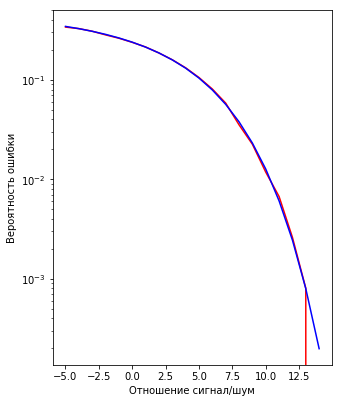

In [14]:
matplotlib.rcParams['figure.figsize'] = 5, 30
gr = plt.subplot(4,1,1)   
gr.set_xlabel('Отношение сигнал/шум')
gr.set_ylabel('Вероятность ошибки')
#Практика
plt.plot(arrSN,arrErrPrt,'red')
#Теория
plt.plot(arrSN,arrErrThr,'blue')
#gr.set_xscale('log')
gr.set_yscale('log')